# RIVEDERE BENE TUTTO

In [4]:
#import libraries needed
import numpy as np
import scipy.sparse.linalg
import pandas as pd
import matplotlib.pyplot as plt

# Optimization in Machine Learning

## Gradient descent (GD)

First task: implement the GD algorithm with the following paramters: f, grad,_f, x0, tolf, tolx, kmax
                                                                                    stopping criteria 
            output: - x-> the stationary point
                    - f_val -> vector containing the values of f during the iterations
                    - err_val -> vector containing the values of || grad_f(x_k) ||
            


In [5]:
def f(x):
    return x**2 + 2*x +1


def grad_f(x):
    return (2*x + 2)

print(grad_f(5))


12


In [6]:
def GD(f, grad_f, x0, tolf, tolx, kmax):
    alpha = 1

    #Iniyialization
    f_val = np.zeros((kmax+1, ))
    err_val = np.zeros((kmax+1, ))

    #Start the iterations
    k = 0
    x = 0
    cond1 = np.linalg.norm(grad_f(x)) > tolf * grad_f(x0)
    cond2 = np.linalg.norm(x - x0) > tolx * np.linalg.norm(x0)
    

    while(cond1 and cond2 and k < kmax):
        #Update alpha
        alpha = backtracking(f, grad_f, x)

        #alpha = 1

        #Update x
        x = x0 - alpha * grad_f(x0)

        #Save the values
        f_val[k] = f(x)
        err_val[k] = np.linalg.norm(grad_f(x))

        #Update k
        k = k+1

        #Update conditions
        cond1 = np.linalg.norm(grad_f(x)) > tolf * grad_f(x0)
        cond2 = np.linalg.norm(x - x0) > tolx * np.linalg.norm(x0)
        

        #Restart
        x0 = x

    #Truncate the vectors
    f_val = f_val[:k]
    err_val = err_val[:k]

    return x, f_val, err_val

In [7]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

In [8]:
x_min, fval, errval = GD(f, grad_f, 2, 1e-6, 1e-6, 1000)
print(x_min)


-0.9999937782801643


(30,)
(30,)
(30, 30)
(30, 30)


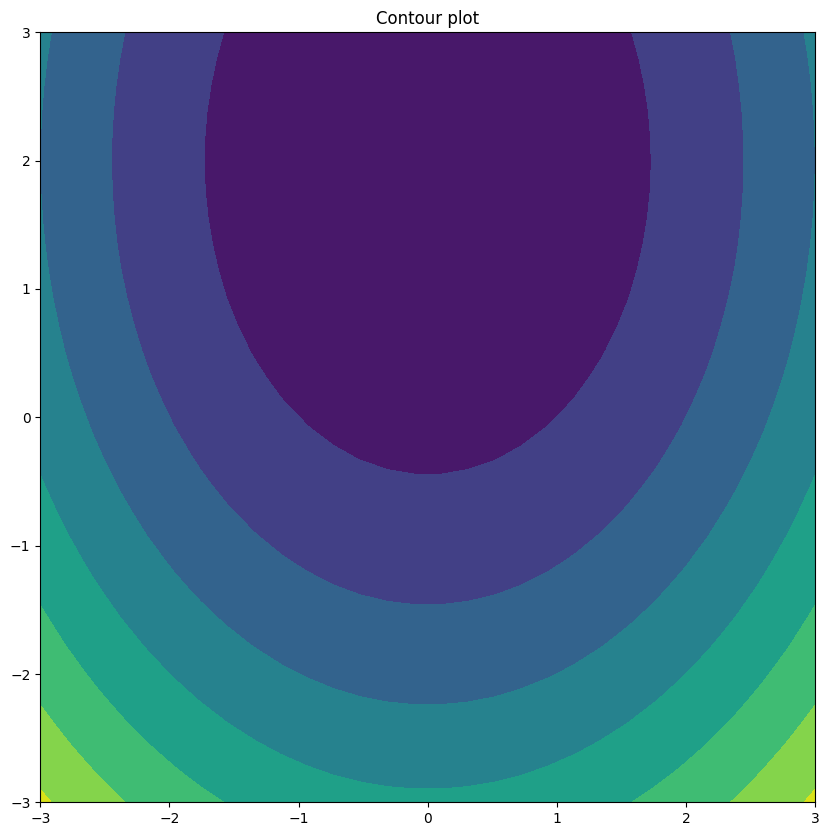

In [9]:
#Contour plot
def f(x1, x2):
    return 2*x1**2  + (x2-2)**2

xv = np.linspace(-3, 3, 30)
yv = np.linspace(-3, 3, 30)

xx, yy = np.meshgrid(xv, yv)

print(xv.shape)
print(yv.shape)

print(xx.shape)
print(yy.shape)

#The element in position xx[i,y] is the x-coordinate of the intersection i,j into the grid

#Compute the value of f over the grid
zz = f(xx, yy)

#contour the plot
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, zz)
plt.title("Contour plot")
plt.show()

(3, 2)


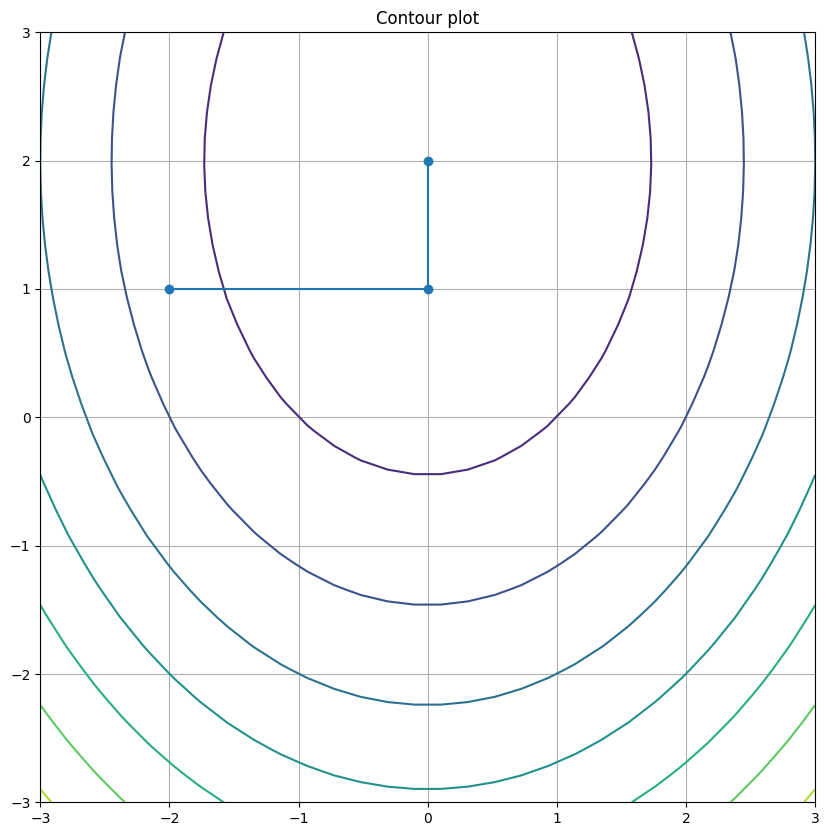

In [10]:
xv = np.linspace(-3, 3, 30)
yv = np.linspace(-3, 3, 30)

xx, yy = np.meshgrid(xv, yv)

#Assume we have a vector of iterations
x = np.array([[-2,1], [0, 1], [0,2]])
print(x.shape)

#contour the plot
plt.figure(figsize=(10, 10))
plt.contour(xx, yy, zz)
plt.plot(x[:,0], x[:,1], 'o-')
plt.title("Contour plot")
plt.grid()
plt.show()

# Stochastic Gradient descent

In [11]:
def l(w, D):
    #Loss function over D
    ...


def grad_l(w, D):
    #Gradient of loss function over D
    ...

def SGD(l, grad_l, w0, D, batch_size, n_epochs):
    #return x -> the stationary point
    alpha = 1
    #alpha = backtracking(f, grad_f, x) #DO NOT USE BACKTRACKING ON STOCHASTIC --> USE FIXED 

    #D-> (X, Y) where X is dxN --- Y is N

    X, Y = D  #Split D into X and Y
    d, N = X.shape

    n_batch_per_epoch = ...

    #For each epoch
    
    for epoch in range(n_epochs):
        for k in range (n_batch_per_epoch):            
            
            #Sample M from D
            Mx <- X #Mx batch from x  --> shape d x batch_size
            My <- Y #My batch from y  --> shape batch_size

            M = (Mx, My)

            #Remove Mx and My from X and Y
            X = ...
            Y = ...

            #Update w
            w = w0 - ...

            #Restart
            w0 = w

        #Reload X and Y
        X = X_backup
        Y = Y_backup

        ## ATTENTION: you have to shuffle again (differently)


    return w


#REMEMBER: in SG, w0 should be chosen randomly (sample from Gaussian)
#UPGRADE: modify the code above to return f_val (over M)
#       where f_val[k] = l(w_k, M)

# Logistic Regression